<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 23** - Dec 5, 2016

- Location, dispersion
- Robust statistics, M-estimation

<hr/>

<h1><font color="darkblue">Robust Statistics</font></h1>

### Datasets

- For example, a set of $n$ scalar measurements 

> $\displaystyle D = \big\{x_i: \ i=1\dots{}n\big\} $

### How to characterize the data?
- Location
- Dispersion
- Shape?

### Maximum Likelihood Estimation

- MLE looks for the parameter for the optimial likelihood function

> Worked well before. Using Gaussian likelihood, the MLE for the location was (weighted) average of measurements. We also used the sample variance for dispersion.

- Problems with outliers when using, e.g., Gaussian likelihood

> Just a few outliers can throw these estimates big time!


### Location

- MLE looks for the parameter for the optimial likelihood function

>$\displaystyle L(\mu) = p(D|\mu) = \prod_{i=1}^n \ell_i(\mu)$

> with $\quad\ell_i(\mu) = f_0(x_i-\mu)$

>$\displaystyle \hat{\mu} = \arg \max_{\mu} \prod_i f_0(x_i-\mu)$

- Very general but for the special family of functions

### How to solve it?

- Solve it as before: take its log and differentiate

>$\displaystyle \hat{\mu} = \arg \min_{\mu} \sum_{i=1}^n \rho(x_i-\mu)$

> where $\quad\rho = -\log f_0$

- At the minimum the derivative vanishes

>$\displaystyle \sum_{i=1}^n \rho'(x_i-\hat{\mu})=0$

- And that's it! Almost...

### What $\rho$?

- For Gaussian likelihood

>$\displaystyle \rho(t) = {t^2}/{2}$

> and we have

>$\displaystyle \sum_{i=1}^n (x_i-\hat{\mu})=0$

- So $\hat{\mu}$ is the **mean** (as before)


### Robust $\rho$-function

- Less sensitive to outliers, e.g.,

>$\rho(t) = |t|$

> and we have

>$\displaystyle \sum_{i=1}^n \textrm{sgn}(x_i-\hat{\mu})=0$

- So $\hat{\mu}$ is the **median** 


### Different $\rho$-functions

- Many possible functions to choose from, e.g., 

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c1/RhoFunctions.png" width=400 align=left \>

### The trick

- Define a new function $W$ 

>$W(t) = \rho'(t) / t$

> so we have

>$\displaystyle \sum_{i=1}^n W(x_i\!-\!\hat{\mu})\,(x_i\!-\!\hat{\mu})=0$

- If we had constant $w_i$ weights

>$\displaystyle \sum_{i=1}^n w_i\,(x_i\!-\!\hat{\mu})=0$

> the solution would be the weighted average

>$\displaystyle \hat{\mu} = \frac{\sum w_ix_i}{\sum w_i}$


### Iterative method

- Intuitive and efficient

>0. Obtain initial estimate of $\hat{\mu}$, e.g., median
0. Assign $w_i=W(x_i\!-\!\hat{\mu})$ weights to the measurements
0. Calculate the weighted average
0. Repeat steps 2 and 3 until convergence

- Very fast convergence in practice

<img src=http://research.microsoft.com/en-us/um/people/zhang/INRIA/Publis/Tutorial-Estim/img333.gif width=500 align=left \>

Populating the interactive namespace from numpy and matplotlib


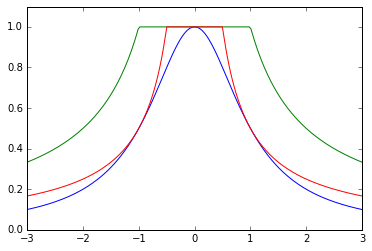

In [1]:
def Wc(t,c=1): # Cauchy
    return 1 / (1 + np.square(t/c))

def Wh(t,k=1): # Huber
    w = np.ones_like(t) #ones shape like t
    abst = np.abs(t) #abs value
    i = (abst > k)
    w[i] = k / abst[i]
    return w

%pylab inline
t = np.linspace(-3,3,200); 
ylim(0, 1.1);
[plot(t,w) for w in [Wc(t), Wh(t), Wh(t,0.5)]];

In [3]:
np.random.seed(42) #set random seed
x = np.random.randn(100,1) #std normal random
x[0] = 200 # outlier
x.mean(), x[1:].mean()

(1.8911863410757943, -0.10991278679212746)

-0.096971123546659335

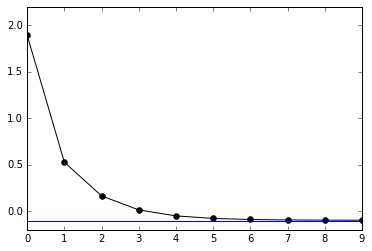

In [14]:
# iterate for robust location
mu, w = [], np.ones_like(x)
ilist = range(10)
for _ in ilist: #'_'也能当变量赋值，毁三观
    m = sum(w*x) / sum(w)
    w = Wc(x-m)
    mu.append(m) # save for plotting

plot(ilist, mu,'ko-'); 
plot(ilist, x[1:].mean()*ones_like(mu), 'b-'); #画条水平线，'b-'形状图
ylim(-0.2,2.2)
m
#x.shape

### Dispersion

- MLE looks for the parameter for the optimial likelihood function

>$\displaystyle L(\sigma) = p(D|\sigma) = \prod_{i=1}^n \ell_i(\sigma)$

> with $\displaystyle\quad\ell_i(\sigma) = \frac{1}{\sigma} f_0\left(\frac{x_i}{\sigma}\right)$

>$\displaystyle \hat{\sigma} = \arg \max_{\sigma} \frac{1}{\sigma^n}\prod_i f_0\left(\frac{x_i}{\sigma}\right)$

- Very general but for "scale" family of functions

### Influence and $\rho$ functions

- Influence function

>$\displaystyle \psi = -f_0'/f_0$

- The $\rho$-function

>$\displaystyle \rho(t) = t\, \psi(t)$



### Optimum

- Derivative vanishes at optimum $\hat{\sigma}$

>$\displaystyle \frac{1}{n} \sum_{i=1}^n \rho\left(\frac{x_i}{\hat{\sigma}}\right) = 1$

- Often $\rho$ is normalized s.t. it tends to 1 as the argument goes to $\infty$

> Scaling is accommodated by new parameter $\delta$

>$\displaystyle \frac{1}{n} \sum_{i=1}^n \rho\left(\frac{x_i}{\hat{\sigma}}\right) = \delta$

> For example, $\delta=1/2\ $ is often used 

### What $\rho$?

- For Gaussian likelihood


>$\displaystyle f_0(t) = \beta\, e^{-t^2/2} \quad$ 
and

>$\displaystyle f_0'(t) = -t \ \beta\, e^{-t^2/2}$ 

> hence

>$\psi(t) = t\quad$ and $\quad\rho(t)=t^2$ 

> and we have

>$\displaystyle \frac{1}{n} \sum_{i=1}^n \left(\frac{x_i}{\hat{\sigma}}\right)^2 = 1$

- So $\hat{\sigma}$ is the **RMS** (as before)

>$\displaystyle \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n x_i^2 $


### The Weight

- Define a new function $W$ 

>$ W(t) = \left\{ \begin{array}{ll}
         \rho(t) / t^2 & \mbox{if $t\neq{}0$}\\
         \rho''(0) & \mbox{if $t=0$}\end{array} \right.  $
         
> so we have

>$\displaystyle \hat{\sigma}^2 = \frac{1}{n\delta} \sum_{i=1}^n W\!\left(\frac{x_i}{\hat{\sigma}}\right)\,x_i^2$

> where $\delta$ is a new parameter

- Play the same iterative trick

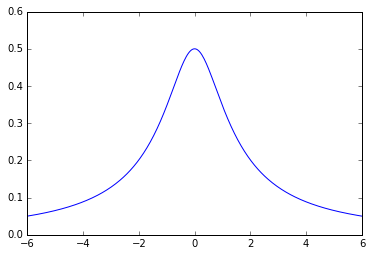

In [16]:
def rho(t,c=1.0):
    return c*c * 0.5 * np.log(1 + np.square(t/c))

def W(t,c=1.0):
    return rho(t,c) / np.square(t)

t = np.linspace(-6,6,300); 
plot(t,W(t)); ylim(0,0.6);

In [17]:
np.sqrt(np.square(x).mean()), np.sqrt(np.square(x[1:]).mean())

(20.020610356439452, 0.91278187530735932)

(20.020610356439452, 0.9578626069648577)

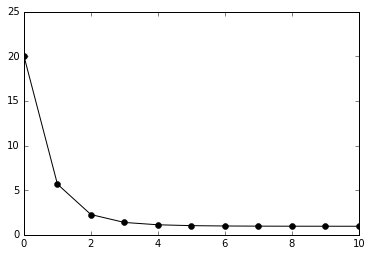

In [18]:
scale, delta = [np.sqrt(np.square(x).mean())], 0.3
for _ in range(10):
    w = W(x/scale[-1])
    scale.append(np.sqrt((np.square(x)*w).mean()/delta))
plot(scale,'ko-'); 
scale[0], scale[-1]

<img src="http://t1.gstatic.com/images?q=tbn:ANd9GcTR6qV3A4eiZFuuDWwHRPZUqhWdmx5-PRlSAuaxbckx6DOMkWTT" width=200 align=right \>

### New opportunities


- Robust regression

> Minimize robust M-scale of residuals instead of RMS

- Robust PCA

> Maximize robust M-scale (squared) instead of variance (Maronna 2005)

array([[  4.00000000e+04],
       [  1.91170170e-02],
       [  4.19500442e-01],
       [  2.31961994e+00],
       [  5.48278029e-02],
       [  5.48201146e-02],
       [  2.49391312e+00],
       [  5.88956064e-01],
       [  2.20406199e-01],
       [  2.94371401e-01],
       [  2.14755958e-01],
       [  2.16904203e-01],
       [  5.85457409e-02],
       [  3.66064129e+00],
       [  2.97534153e+00],
       [  3.16167266e-01],
       [  1.02582688e+00],
       [  9.87513860e-02],
       [  8.24507722e-01],
       [  1.99460174e+00],
       [  2.14812631e+00],
       [  5.09749379e-02],
       [  4.56005843e-03],
       [  2.02990739e+00],
       [  2.96352551e-01],
       [  1.23038209e-02],
       [  1.32478622e+00],
       [  1.41149001e-01],
       [  3.60766836e-01],
       [  8.50852437e-02],
       [  3.62050847e-01],
       [  3.43093447e+00],
       [  1.82175076e-04],
       [  1.11875241e+00],
       [  6.76580132e-01],
       [  1.49045922e+00],
       [  4.36240013e-02],
 